# 0419 TA

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[8794]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 134,
        253, 255, 253, 253, 213,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

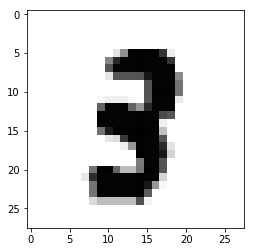

In [8]:
plt.imshow(x_train[8794], cmap="Greys")

In [9]:
y_train[8794]

3

In [10]:
x_train[8794].shape

(28, 28)

In [11]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [12]:
x_train[8794].shape

(784,)

In [13]:
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y_train, 10)

In [15]:
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
y_train[8794]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import  SGD

In [18]:
model_1 = Sequential()

In [19]:
model_1.add(Dense(4, input_dim=784))
model_1.add(Activation("sigmoid"))

In [20]:
model_1.add(Dense(2))
model_1.add(Activation("sigmoid"))

In [21]:
model_1.add(Dense(10))
model_1.add(Activation("softmax"))

In [22]:
model_1.compile(loss = 'mse', 
              optimizer = SGD(lr=0.087),
              metrics = ["accuracy"])

In [23]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_1_20 = model_1.fit(x_train, y_train, 
          batch_size=100, 
          epochs=20, 
          verbose=1, 
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0901 - acc: 0.0975 - val_loss: 0.0898 - val_acc: 0.0974

In [27]:
from ipywidgets import interact_manual

In [28]:
predict = model_1.predict_classes(x_test)

In [45]:
model_1.predict(x_test)[0]

array([0.14377278, 0.15657811, 0.09944345, 0.07682832, 0.07096376,
       0.07711728, 0.0926608 , 0.12631054, 0.08578923, 0.07053577],
      dtype=float32)

In [29]:
def test(num):
    plt.imshow(x_test[num].reshape(28,28), cmap="Greys")
    print("神經網路判斷為:", predict[num])

神經網路判斷為: 1


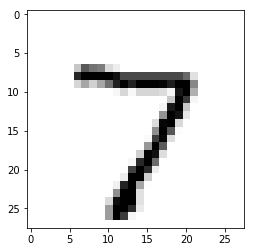

In [30]:
interact_manual(test, num =(0,9999))

In [31]:
score = model_1.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 39us/step


In [32]:
score

[0.08657695446014405, 0.1948]

In [33]:
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

測試資料的 loss: 0.08657695446014405
測試資料正確率: 0.1948


In [34]:
x_train_1 = x_train / x_train.max()
x_test_1 = x_test / x_test.max()

In [35]:
x_train_1.max()

1.0

In [36]:
x_train_2 = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_2 = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [38]:
x_train_2.max()

1.0

In [39]:
model_2 = Sequential()
model_2.add(Dense(4, input_dim=784))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(2))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(10))
model_2.add(Activation("softmax"))
model_2.compile(loss = 'mse', 
              optimizer = SGD(lr=0.05),
              metrics = ["accuracy"])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_7 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_8 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_2_20 = model_2.fit(x_train_1, y_train,
                        batch_size = 100,
                        epochs = 20,
                        verbose = 1,
                        validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0903 - acc: 0.0991 - val_loss: 0.0902 - val_acc: 0.1009

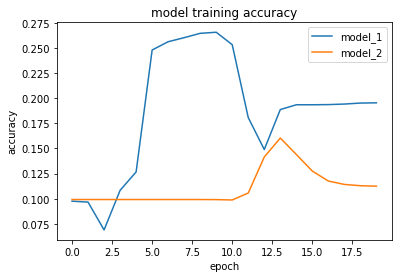

In [41]:
plt.plot(model_1_10.history["acc"])
plt.plot(model_2_20.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")
plt.show()

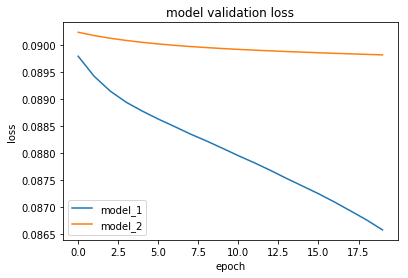

In [42]:
plt.plot(model_1_10.history["val_loss"])
plt.plot(model_2_20.history["val_loss"])

plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")
plt.show()

### Activation function

### 可參考keras檔案：https://keras.io/activations/
### 或是維基百科：https://en.wikipedia.org/wiki/Activation_function

### softmax
${\displaystyle f_{i}({\vec {x}})={\frac {e^{x_{i}}}{\sum _{j=1}^{J}e^{x_{j}}}}}$

Range : $(0,1)$

可以將輸出值轉換成像是機率分佈，全部輸出加起來等於1

### tanh
${\displaystyle f(x)=\tanh(x)={\frac {(e^{x}-e^{-x})}{(e^{x}+e^{-x})}}}$

Range : $(-1,1)$



In [106]:
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [107]:
x = np.linspace(-10, 10, 200)

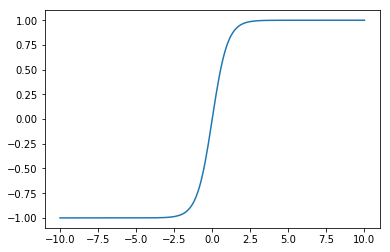

In [108]:
plt.plot(x, tanh(x))

### sigmoid
${\displaystyle f(x)={\frac {1}{1+e^{-x}}}}$

Range : $(0,1)$



In [109]:
def sigmoid(x):
    return 1.0 /(1.0 + np.exp(-x))

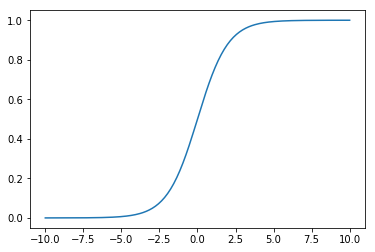

In [110]:
plt.plot(x, sigmoid(x))

### elu
${\displaystyle f(\alpha ,x)={\begin{cases}\alpha (e^{x}-1)&{\text{for }}x\leq 0\\x&{\text{for }}x>0\end{cases}}}$

Range : ${\displaystyle (-\alpha ,\infty )}$



In [111]:
def elu(x, a):
    y = x.copy()
    for i in range(len(y)):
        if y[i]<0:
            y[i] = a * (np.exp(y[i])-1)
    return y

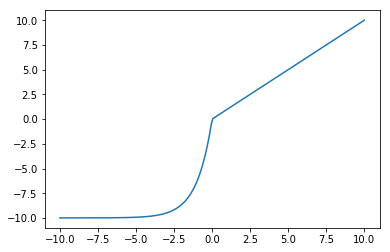

In [112]:
plt.plot(x,elu(x,10))

### relu
${\displaystyle f(x)={\begin{cases}0&{\text{for }}x<0\\x&{\text{for }}x\geq 0\end{cases}}}$

Range : $[0,\infty )$




In [113]:
def relu(x):
    y = x.copy()
    y[y < 0] = 0
    return y

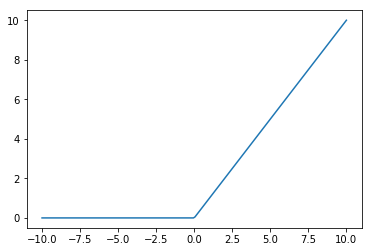

In [114]:
plt.plot(x,relu(x))

### selu
${\displaystyle f(\alpha ,x)=\lambda {\begin{cases}\alpha (e^{x}-1)&{\text{for }}x<0\\x&{\text{for }}x\geq 0\end{cases}}}
with {\displaystyle \lambda =1.0507} and {\displaystyle \alpha =1.67326}$

Range : ${\displaystyle (-\lambda \alpha ,\infty )}$



- ### softplus

- ### softsign

- ### hard_sigmoid

- ### linear

### Loss Funciton

### 可參考keras檔案：https://keras.io/losses/

### mean_squared_error

${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}}$

In [115]:
def mse(true, pred):
    a = 0
    for i in range(len(true)):
        a += (true - pred)**2
    return a / len(true)

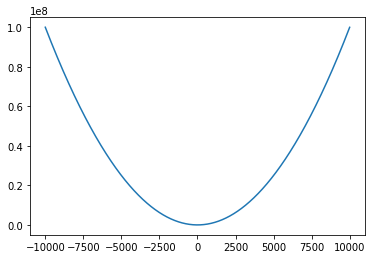

In [119]:
target = np.repeat(0, 10000) 
pred = np.arange(-10000,10000, 2)
plt.plot(pred, mse(target, pred))

### mean_absolute_error

${\displaystyle \mathrm {MAE} ={\frac {1}{n}{\sum _{i=1}^{n}\left|Y_{i}-{\hat {Y_{i}}}\right|}}}$

In [120]:
def mae(true, pred):
    a = 0
    for i in range(len(true)):
        a += np.abs((true - pred))
    return a / len(true)

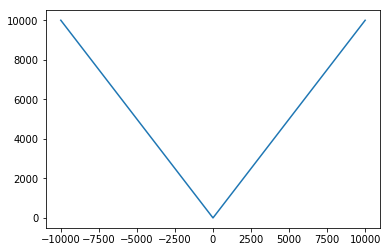

In [121]:
plt.plot(pred, mae(target, pred))

### binary_crossentropy

${\displaystyle \mathrm -{\frac {1}{N}}\sum _{n=1}^{N}\ {\bigg [}y_{n}\log {\hat {y}}_{n}+(1-y_{n})\log(1-{\hat {y}}_{n}){\bigg ]}}$

### categorical_crossentropy

${\displaystyle \mathrm -{\frac  {1}{N}}\sum _{{i=1}}^{N}\sum _{{c=1}}^{C}{1_{y_i \in C_c}}\log p_{model}[y_i \in C_c]}$

##### 可參考此篇討論：https://github.com/keras-team/keras/issues/6444

- ### mean_absolute_percentage_error

- ### mean_squared_logarithmic_error

- ### squared_hinge

- ### hinge

- ### sparse_categorical_crossentrop

- ### kullback_leibler_divergence

- ### poisson

- ### cosine_proximity

### Optimizer

### 可參考keras檔案：https://keras.io/optimizers/

- ### SGD
- ### RMSprop
- ### Adagrad
- ### Adadelta
- ### Adam
- ### Adamax
- ### Nadam